# Texas Death Penalty Analysis"
> "DH 140/250 Final Project"

- toc:true
- badges: true
- comments: true
- author: Lily Kohn
- categories: [fastpages, jupyter]

## Introduction
### Project Overview and Motivation
This project looks at the 553 death penalty executions that took place in Texas from 1982-2018. The dataset for this project comes from the Texas Department of Criminal Justice. It does not include the 15 executions that took place in the years of 2019-2021. Nor does it include the hundreds of executions that took place in Texas pre-1982, by means other than lethal injection.

This project was inspired, in part, by the work of Dr. Robin Conley Riner. Her book, *Confronting the Death Penalty: How Language Influences Jurors in Capital Cases* (2015), served as a critical lens for examining the ways in which the humanity of ‘capital offenders’ is intentionally narrated and mitigated throughout the legal process. It is a book that I taught as a TA in Introduction to Sociocultural Anthropology, and the working through this analysis was a great supplementary framework through which to understand Riner's discussion. 

### Research Topic and Questions
To begin, it is important to remember that merely 10-years before the start of this data, in 1972, the Supreme Court declared that "the imposition and carrying out of the death penalty… constitutes cruel and unusual punishment in violation of the Eighth and Fourteenth Amendments" (Furman v. Georgia, 408 U.S. 238). The Supreme Court was particularly focused on the cruelty and the randomness in which death penalty laws had been applied, and found the death penalty to be constitutionally unacceptable. However, within four years of the Furman decision, several hundred people (ACLU, 2021) had been sentenced to death under new state capital punishment statutes written with the intention to provide more clear, humane sentencing guidelines to juries. These statutes required a two-stage, or bifurcated, trial procedure in which the just first determines culpability (i.e. guilt or innocence), followed by a second trial where the same jury determines sentencing. 

The following project aim to reestablish responsibility + agency in death penalty sentences-- looking to the questsion of **where these death penalty sentences are happening and to whom.** Another reason I was drawn to this dataset was the inclusion of the column "Last Statement", which presents the last words spoken by the individual before exection; it is an intentional statement. Again building off Riner's analysis, **this project will work to reestablish empathy and rehumanize the executed through text analysis by examining the last words spoken by executed individuals.**



## Methods
Special attention was paid throughout this process to find ways to present this as a respectfully as possible. These visualizations represent lives lost, not 'objective' data points. For this reason, visualization methods were selected that aimed to highlight the humanity and personhood of the individual who has been executed-- focusing in particular on biographical information and the executed's last words. Institutional trends are also considered through the lens of agency and responsibility. 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
#import dataset
df = pd.read_csv('tx_deathrow.csv')

In [109]:
df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Race,Execution Date 1,Execution Date 2,Execution Date 3,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,Black,2018,7,17,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,White,2018,6,27,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,Hispanic,2018,5,16,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,Black,2018,4,25,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,Hispanic,2018,3,27,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


In [110]:
#examine columns
df.columns

Index(['Execution', 'Date of Birth', 'Date of Offence',
       'Highest Education Level', 'Last Name', 'First Name', 'TDCJ\nNumber',
       'Age at Execution', 'Date Received', 'Race', 'Execution Date 1',
       'Execution Date 2', 'Execution Date 3', 'County', 'Eye Color', 'Weight',
       'Height', 'Native County', 'Native State', 'Last Statement'],
      dtype='object')

in order to create more uniform data, execution date columns will be combined. Execution Date 1 will be renamed in order to help analysis later on

In [111]:
cols=['Execution Date 1', 'Execution Date 2', 'Execution Date 3']

In [112]:
df['Execution Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [113]:
df.rename(columns={'Execution Date 1': 'Execution Year'}, inplace=True)

Now, I want to drop any data that identifies the person as individual or familial consent has not been given for this project. Unnecessary columns will also be dropped.

In [114]:
new_df=df.drop(columns=['Last Name', 'First Name', 'Eye Color', 'Weight', 'Height', 'Execution Date 2', 'Execution Date 3',])

In [115]:
#check new columns
new_df.columns

Index(['Execution', 'Date of Birth', 'Date of Offence',
       'Highest Education Level', 'TDCJ\nNumber', 'Age at Execution',
       'Date Received', 'Race', 'Execution Year', 'County', 'Native County',
       'Native State', 'Last Statement', 'Execution Date'],
      dtype='object')

In [116]:
# check for missing NaN values in the rows as well
print("Shape of our df:", new_df.shape)
print("Shape of our df with NaN removed:", new_df.dropna().shape)

Shape of our df: (553, 14)
Shape of our df with NaN removed: (402, 14)


This is a fair amount of missing data, let's see where this missing data is coming from.

In [117]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Execution                553 non-null    int64  
 1   Date of Birth            539 non-null    object 
 2   Date of Offence          536 non-null    object 
 3   Highest Education Level  505 non-null    float64
 4   TDCJ
Number              553 non-null    int64  
 5   Age at Execution         553 non-null    int64  
 6   Date Received            539 non-null    object 
 7   Race                     553 non-null    object 
 8   Execution Year           553 non-null    int64  
 9   County                   553 non-null    object 
 10  Native County            510 non-null    object 
 11  Native State             524 non-null    object 
 12  Last Statement           443 non-null    object 
 13  Execution Date           553 non-null    object 
dtypes: float64(1), int64(4), o

In [118]:
#drop empty fields
new_df.dropna(axis = 0 , inplace= True)

In [119]:
new_df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,TDCJ\nNumber,Age at Execution,Date Received,Race,Execution Year,County,Native County,Native State,Last Statement,Execution Date
0,553,1983-09-24,2004-11-21,9.0,999508,34,2006-03-31,Black,2018,Bexar,Bexar,Texas,l want to make sure the Patel family knows I l...,2018-7-17
2,551,1981-04-03,2003-12-03,10.0,999502,37,2005-09-27,Hispanic,2018,Bexar,Bexar,Texas,To everyone that has been there for me you kno...,2018-5-16
3,550,1987-04-04,2008-04-06,11.0,999545,31,2009-02-27,Black,2018,Tarrant,Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ...",2018-4-25
4,549,1980-03-26,2005-09-13,12.0,999534,38,2008-05-14,Hispanic,2018,Lubbock,Wichita,Texas,First I would like to say I have been here sin...,2018-3-27
5,548,1955-08-02,2001-05-02,12.0,999412,62,2002-05-01,White,2018,Dallas,Dallas,Texas,"No, Well, Hi Mary Jean. See y'all later. Go ah...",2018-2-1


Looking back at the datatype of each column found in the info, I will now change all date columns from objects to datetime.

In [120]:
new_df['Date Received'] = pd.to_datetime(df['Date Received'])

In [121]:
new_df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [122]:
new_df['Date of Offence'] = pd.to_datetime(df['Date of Offence'])

In [123]:
new_df['Execution Date'] = pd.to_datetime(df['Execution Date'])

In [124]:
#check new info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 552
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Execution                402 non-null    int64         
 1   Date of Birth            402 non-null    datetime64[ns]
 2   Date of Offence          402 non-null    datetime64[ns]
 3   Highest Education Level  402 non-null    float64       
 4   TDCJ
Number              402 non-null    int64         
 5   Age at Execution         402 non-null    int64         
 6   Date Received            402 non-null    datetime64[ns]
 7   Race                     402 non-null    object        
 8   Execution Year           402 non-null    int64         
 9   County                   402 non-null    object        
 10  Native County            402 non-null    object        
 11  Native State             402 non-null    object        
 12  Last Statement           402 non-nul

In [125]:
import datetime as dt

I now want to make a new column which looks at how long each individual was on death row prior to execution.
I will do this by subtracting the date received column from the execution date.

In [126]:
new_df['Time on Death Row'] = (new_df['Execution Date'] - new_df['Date Received'])

In [127]:
#hide 
#check new column
new_df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,TDCJ\nNumber,Age at Execution,Date Received,Race,Execution Year,County,Native County,Native State,Last Statement,Execution Date,Time on Death Row
0,553,1983-09-24,2004-11-21,9.0,999508,34,2006-03-31,Black,2018,Bexar,Bexar,Texas,l want to make sure the Patel family knows I l...,2018-07-17,4491 days
2,551,1981-04-03,2003-12-03,10.0,999502,37,2005-09-27,Hispanic,2018,Bexar,Bexar,Texas,To everyone that has been there for me you kno...,2018-05-16,4614 days
3,550,1987-04-04,2008-04-06,11.0,999545,31,2009-02-27,Black,2018,Tarrant,Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ...",2018-04-25,3344 days
4,549,1980-03-26,2005-09-13,12.0,999534,38,2008-05-14,Hispanic,2018,Lubbock,Wichita,Texas,First I would like to say I have been here sin...,2018-03-27,3604 days
5,548,1955-08-02,2001-05-02,12.0,999412,62,2002-05-01,White,2018,Dallas,Dallas,Texas,"No, Well, Hi Mary Jean. See y'all later. Go ah...",2018-02-01,5755 days


### Now that this cleaning is complete, further analysis on the data can be done.

## Results

In [128]:
new_df.describe()

,Execution,Highest Education Level,TDCJ\nNumber,Age at Execution,Execution Year,Time on Death Row
count,402.000000,402.000000,402.000000,402.000000,402.000000,402
mean,309.898010,10.116915,596904.701493,39.286070,2004.044776,4085 days 22:23:17.014925376
std,146.640729,2.008402,490340.482387,8.357967,6.713814,1545 days 22:02:51.481744880
min,1.000000,3.000000,550.000000,24.000000,1982.000000,252 days 00:00:00
25%,194.250000,9.000000,886.250000,33.000000,1999.000000,3012 days 18:00:00
50%,319.000000,10.000000,999090.500000,38.000000,2004.000000,3916 days 00:00:00
75%,435.750000,12.000000,999293.750000,44.000000,2009.000000,4792 days 06:00:00
max,553.000000,16.000000,999555.000000,67.000000,2018.000000,11346 days 00:00:00


#### I first want to use the above summary statistics to visualize the and understand more about the **age** at which individuals are being executed.

In [129]:
avg_age=new_df['Age at Execution'].mean()
print('Age at Execution (mean):', avg_age)

Age at Execution (mean): 39.28606965174129


The average age at execution is 32 years-old.

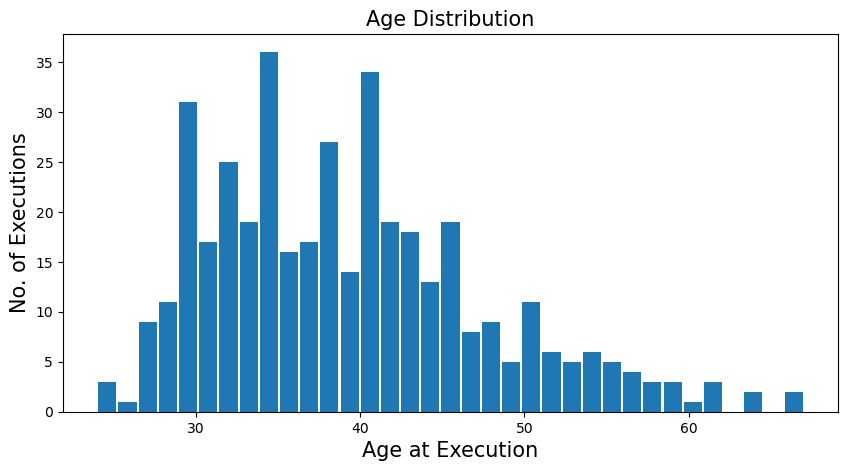

In [130]:
# Create chart to see the distribution of the age at execution 
plt.figure(figsize=(10,5), dpi = 100)

# x-axis 
plt.xlabel('Age at Execution', fontsize = 15)
# y-axis 
plt.ylabel('No. of Executions', fontsize=15)
# Name of the graph
plt.title('Age Distribution', fontsize=15)

# Plot
plt.hist(new_df['Age at Execution'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()

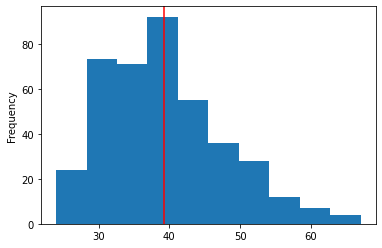

In [131]:
#another view of the same data
new_df['Age at Execution'].plot(kind='hist')
plt.axvline(x=39.286070	, color = 'r')

We see in the above charts a staggering trend of executions of capital offenders between the ages of 20-40. It is important to note that in 2005 the Supreme Court decided that the Eighth and Fourteenth Amendments of the Constitution forbid imposition of the death penalty on offenders who were under the age of 18 when their crimes were committed. As we can see, a number of individuals who committed their accused crime at age 17 were executed before this ruling took place. 

#### Stepping back for a moment, it is important to look at how many executions have taken place over time. We will use the renamed **Year** column to look at this data.

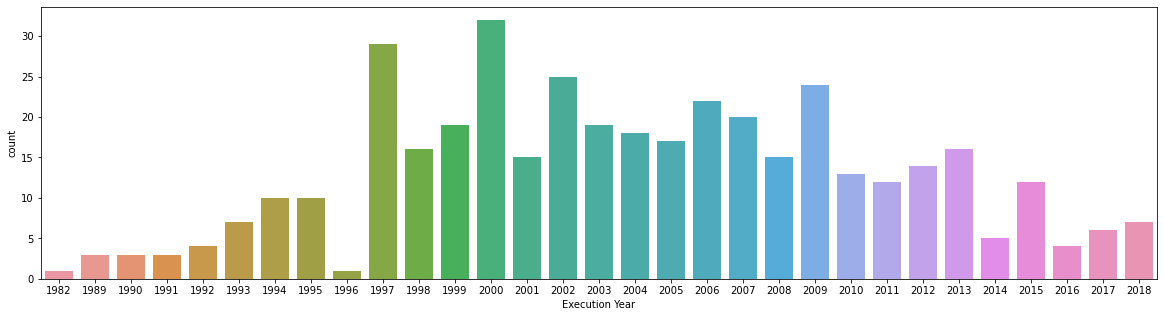

In [132]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Execution Year",data=new_df)

#### This next visualization focuses on the **native state of the executed**. We can use this data to better understand the geographic demographics of the dataset. 

In [133]:
native_state = new_df.groupby('Native State')[['Execution']].count()
print (native_state)

                Execution
Native State             
Alabama                 1
Arizona                 1
Arkansas                4
California             10
Colorado                4
Cuba                    1
Florida                 2
France                  1
Georgia                 5
Germany                 2
Honduras                1
Idaho                   1
Illinois                9
Indiana                 3
Kansas                  1
Kentucky                4
Louisiana               9
Maryland                1
Mexico                  7
Michigan                4
Minnesota               1
Mississippi             2
Missouri                6
New Jersey              1
New Mexico              3
New York                7
North Carolina          1
Ohio                    7
Oklahoma                9
Oregon                  1
Pennsylvania            1
Philippines             1
Rhode Island            1
South Carolina          2
South Dakota            1
Tennessee               3
Texas       

This information shows us that the majority of executed individuals in Texas were originally from Texas. I found this information surprising as I believed there was a lot of movement during the sentencing process.

#### The next visualization focuses on death sentences imposed by **county** in the state of Texas. We can see in the data that death sentences are not uniformly imposed in Texas-- of Texas’ 254 counties, 136 have never sent a single offender to death row (ACLU, 2021). 

Harris        81
Dallas        49
Bexar         34
Tarrant       33
Smith         12
Lubbock       11
Montgomery    11
Nueces        10
Brazos         9
Jefferson      9
Potter         6
Hidalgo        6
Travis         6
McLennan       6
Bowie          5
Collin         5
Cameron        5
Name: County, dtype: int64


<AxesSubplot:>

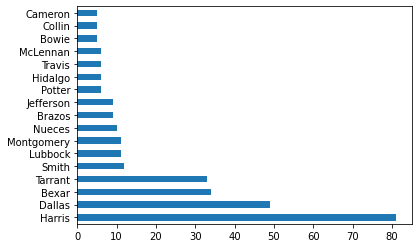

In [134]:
Execution_by_County = list(new_df['County'].value_counts()[new_df['County'].value_counts() >= 5].index)
print(new_df['County'].value_counts()[new_df['County'].value_counts() >= 5])
new_df['County'].value_counts()[new_df['County'].value_counts() >= 5].plot(kind='barh')

In [135]:
Execution_by_County = list(new_df['County'].value_counts()[new_df['County'].value_counts() <= 5].index)
print(new_df['County'].value_counts()[new_df['County'].value_counts() <= 5])

Bowie      5
Collin     5
Cameron    5
Navarro    4
Taylor     4
          ..
Madison    1
Kendall    1
Morris     1
Liberty    1
Milam      1
Name: County, Length: 64, dtype: int64


While the majority of the death penalty sentences are centered around major population hubs-- Houston, Dallas and San Antonio, we are able to see the major role Harris County (Houston) plays in the death penalty landscape of Texas. It is crucial to consider here the role individual district attorneys play in capital punishment sentences; it is the district attorney that has the sole decision-making power when choosing whether to seek the death penalty in capital cases. 

#### The next visualization focuses on death sentences by **Race** in the state of Texas.

White       170
Black       155
Hispanic     77
Name: Race, dtype: int64


<AxesSubplot:ylabel='Race'>

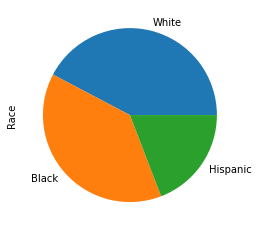

In [136]:
race = list(new_df['Race'].value_counts()[new_df['Race'].value_counts() >= 0].index)
print(new_df['Race'].value_counts()[new_df['Race'].value_counts() >= 0])
new_df['Race'].value_counts()[new_df['Race'].value_counts() >= 0].plot(kind='pie')

The race of individuals in majority Black or White. It is important to note, however, that the racial categories listed are those used by the Department of Corrections and are assigned to an individual by the arresting officer. This data does not account for those who identify as biracial or multiracial. The categories themselves are both narrow, yet largely nonspecific. 

Another missing piece of this dataset is the number of capital cases where the defendant was found guilty, yet not given the death sentence. The ACLU has found race (2021) to be a decisive factor in capital trial sentencing decisions where people of color, particularly black men, are disproportionately more likely to receive a death penalty sentence. In 1990, the U.S. General Accounting Office reported to the Congress that there was "a pattern of evidence indicating racial disparities in the charging, sentencing, and imposition of the death penalty after the Furman decision" and that "race of victim influence was found at all stages of the criminal justice system process..."

In [137]:
new_df['Time on Death Row'].describe()

count                             402
mean     4085 days 22:23:17.014925376
std      1545 days 22:02:51.481744880
min                 252 days 00:00:00
25%                3012 days 18:00:00
50%                3916 days 00:00:00
75%                4792 days 06:00:00
max               11346 days 00:00:00
Name: Time on Death Row, dtype: object

Capital punishment is a long process. We can see from the below visualization that the average death row inmate waits between 7-12 years between sentencing and execution. We also see, however, that some wait upward of 30 years between sentencing and executions. While appeals can be taking place during this time, it is crucial for us to consider the life of an individual on death row during this time.

These incarcerated individuals are predominantly housed in solitary confinement. In solitary confinement, "inmates are often isolated for 23 hours each day without access to training or educational programs, recreational activities, or regular visits. Such conditions have been demonstrated to provoke agitation, psychosis, delusions, paranoia, and self-destructive behavior," (ACLU, 2021).

### Text Analysis
Riner argues that jurors are guided, through courtroom language and written instructions, to think of the defendant not as a person, but as a token of a rare type—the exceptionally violent. This type of language thus encourages the perspective that the defendant’s personhood is hopelessly tied up with his criminality and status as a capital defendant.

The following two visualizations were created to examine the last words of incarcerated individuals. To create these visualizations, the last words of all the executed individuals listed in the original dataset were compiled into a corpus and then analyzed using both frequency and sentiment analysis.

In [138]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

In [139]:
new_df['Last Statement']=new_df['Last Statement'].apply(str)

In [140]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [141]:
#making lists of all the last statements. 
last_statements = new_df["Last Statement"].tolist()
last_statements

["l want to make sure the Patel family knows I love them like they love me. Make sure the kids in the world know I'm being executed and those kids I've been mentoring keep this fight going. I'm good Warden.",
 "To everyone that has been there for me you know who you are. Love y'all. See y'all on the other side.That's it.",
 "Yes, I would like to say nephew it burns huh. You know I might have lost the fight but I'm still a soldier. I still love you all. To my supporters and family y'all hold it down. Ten Toes down right. That's all.",
 'First I would like to say I have been here since September 2005.  I had the honor and privilege to know many prison guards and staff.  I want to thank all of them.  I would like for everyone to write the people on death row as they are all good men and I am very happy I got to know them.  All of their lives are worth knowing about.\n\nSecondly on February 14th the medical examiner and the chief nurse were engaged in numerous false illegal acts.  They tri

In [142]:
#hide 
print(last_statements)

["l want to make sure the Patel family knows I love them like they love me. Make sure the kids in the world know I'm being executed and those kids I've been mentoring keep this fight going. I'm good Warden.", "To everyone that has been there for me you know who you are. Love y'all. See y'all on the other side.That's it.", "Yes, I would like to say nephew it burns huh. You know I might have lost the fight but I'm still a soldier. I still love you all. To my supporters and family y'all hold it down. Ten Toes down right. That's all.", 'First I would like to say I have been here since September 2005.  I had the honor and privilege to know many prison guards and staff.  I want to thank all of them.  I would like for everyone to write the people on death row as they are all good men and I am very happy I got to know them.  All of their lives are worth knowing about.\n\nSecondly on February 14th the medical examiner and the chief nurse were engaged in numerous false illegal acts.  They tried 

In [143]:
#hide 
all_text = ', '.join(last_statements)
all_words = word_tokenize(all_text)

len(all_words)

52677

In [144]:
#hide 
stop_words = set(stopwords.words("english"))
punctuation = ['.', ',', '’', ':', 'I']
for word in all_words:
    if word in stop_words or word in punctuation:
        all_words.remove(word)
        
len(all_words)

32414

In [145]:
#hide 
most_frequent = FreqDist(all_words)
most_frequent.most_common(20)

[('I', 2331),
 ('.', 733),
 ('love', 731),
 ('the', 601),
 ('my', 355),
 ('you', 339),
 ('family', 337),
 ('all', 337),
 ("n't", 325),
 ('know', 320),
 ('and', 310),
 ("'s", 295),
 (',', 284),
 ('sorry', 250),
 ('would', 237),
 ('to', 237),
 ('want', 234),
 ('like', 224),
 ('for', 218),
 ('God', 214)]

Text(0, 0.5, 'Frequency')

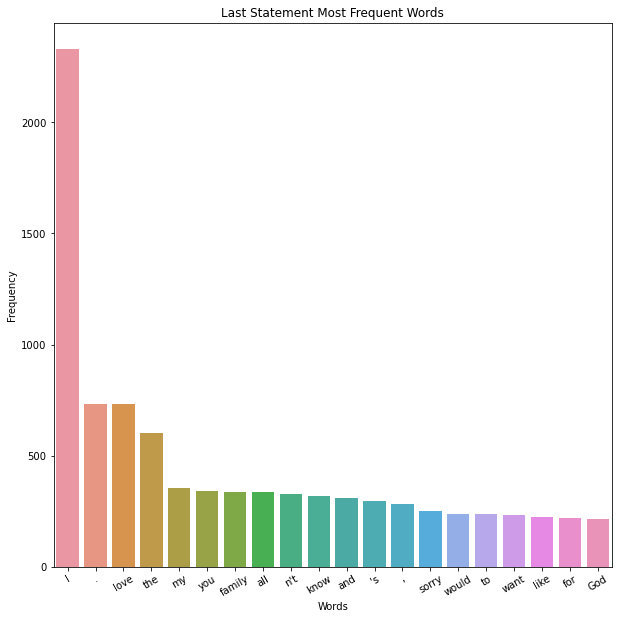

In [146]:
#hide 
## Creating FreqDist for keeping the 20 most common words
fdist = FreqDist(all_words).most_common(20)
# Creating barplot
fdist = pd.Series(dict(fdist))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xticks(rotation=30);
# Set title
ax.set_title("Last Statement Most Frequent Words")  
# adding labels
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

Above we have the most frequent words in the last statement corpus; however, this list could be better.

In [147]:
txNoStopWords = [w for w in all_words if w not in myStopWords]

In [148]:
freq_tx = FreqDist(txNoStopWords)
#finding the 20 most frequently used words in TX last statments
for i in sorted(freq_tx, key=freq_tx.get, reverse=True)[:20]:
    print(i,freq_tx[i])

love 731
family 337
know 320
sorry 250
God 214
say 168
thank 164
hope 147
life 139
going 133
Lord 132
forgive 130
people 124
peace 117
Thank 115
see 108
one 106
Jesus 98
take 92
done 88


Text(0, 0.5, 'Frequency')

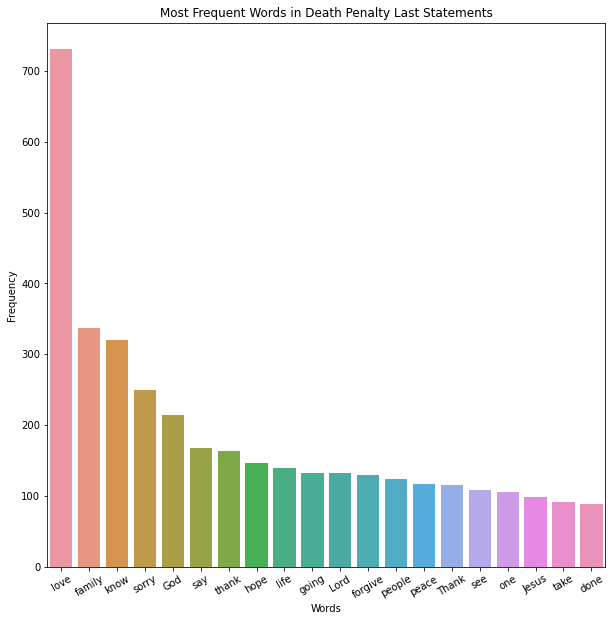

In [149]:
## Creating FreqDist for keeping the 20 most common words
fdist = FreqDist(txNoStopWords).most_common(20)
# Creating barplot
fdist = pd.Series(dict(fdist))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xticks(rotation=30);
# Set title
ax.set_title("Most Frequent Words in Death Penalty Last Statements")  
# adding labels
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

This list of words is deeply universal and helps to futher the aim of presenting the humanity within the last statements.

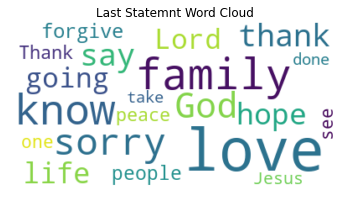

In [150]:
# Plotting the wordcloud
wcloud = WordCloud(background_color="white").generate_from_frequencies(fdist)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
title = "worddy cliud"
plt.title('Last Statemnt Word Cloud')
plt.show()

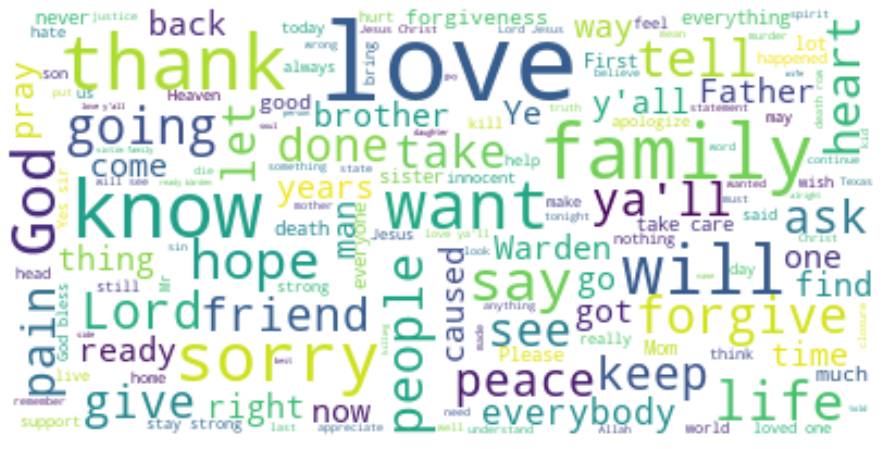

In [151]:
#bigger word cloud
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(all_text)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [152]:
extrastopwords = ['``', "'s", "''", '``',"n't", "'m", 'I',"'ll",'to',"'the","'re'", 'for', "'re","'ve", 'na','wan','would','said', "like", "'d", ".", ",", ":", ";", "To", "Yes", "ya", "want", "You" ]    
myStopWords = list(punctuation) + stopwords.words('english') + extrastopwords

The visualizations above look at key words and themes present within the corpus of last words. The visualizations establishes which words occur most frequently amongst the executed's last statements.

As we can see, the words that appeared most frequently across the corpus are: love, family, know, sorry and God. These words are both expected, yet deeply sobering. Let's now look to the sentiment of the last statement corpus.

In [153]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [154]:
sia = vader.SentimentIntensityAnalyzer()

In [155]:
sia.polarity_scores(all_text)

{'neg': 0.099, 'neu': 0.602, 'pos': 0.298, 'compound': 1.0}

Through a quick sentiment analysis, we can see that the last statement corpus is overall positive. Perhaps we can frame through an understanding of the finality of the moment. 

## Discussion
Through this project, we are able to see a number of institutional trends regarding the death penalty in Texas. These findings help us better understand the landscape of executions in Texas-- i.e. what counties are the most involved, how it affects people across race, age and geography. Texas is the state in the United States which completes the largest number of executions, so it is useful to look to Texas to better understand the overall picture of death penalty executions in America. 

As Riner writes: "Death penalty trials entail a variety of communicative distancing practices—talk of facts and evidence that eclipse embodied encounters during trial, dehumanizing references to defendants that stymie empathy between them and jurors, written and oral instructions that allow jurors to deny their personal involvement in defendants’ deaths—that deny the humanistic side of legal decision-making," (Conley Riner 2015: 201). It is my hope that through presenting the last words of those executed that we can better represent the humanity of incarcerated individuals that oftentimes get stripped through the legal process. In focusing on universal words such as "love", "family" and "God", we can better connect to those who have been exectuted.



**References**

Conley Riner, R. Confronting the Death Penalty: How Language Influences Jurors in Capital Cases. Oxford Studies, Language and Law. 2016.

"Texas Death Penalty Developments in 2018: The Year in Review." The Texas Coalition to Abolish the Death Penalty. Accessed March 1, 2021. https://tcadp.org/wp-content/uploads/2019/01/Texas-Death-Penalty-Developments-in-2018-final-print-version.pdf

"The Case Against the Death Penalty." The American Civil Liberties Union. Accessed March 1, 2021. https://www.aclu.org/other/case-against-death-penalty